In [1]:
import numpy as np
import pandas as pd
import json # for reading in the json data file
import matplotlib.pyplot as plt

Reading in json data from data source file

In [2]:
json_file = open('loan_data_json.json')

In [3]:
data = json.load(json_file) # using load fucntion in json library

Reading the json data in the form of a data frame

In [4]:
loandata = pd.DataFrame(data)

In [5]:
loandata.head() # checking some rows of data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Below is a brief explanation of all columns available in the above dataset

Credit Policy : Either 1 or 0. 1 implies that the borrower meets the bank's loan lending criteria
according to the credit policy.

Purpose : Reason for the borrower to take loan from bank

Int.rate : Interest rate at which bank lends the loan to the borrower. As per the bank's policy, people who have a bad credit history are offered loans at higher interest rates than those who do not default or have a good credit history

Installment : The monthly installments owed by the borrower if the loan is funded (in dollars)

log.annual.inc : The natural log of the self-reported annual income of the borrower

dti : Debt to income ratio of the borrower. Simply said, Debt taken from bank / Annual income of the borrower

fico : Credit Score of the borrower as determined in USA banks
- 300 - 400: Very Poor
- 401 - 600: Poor
- 601 - 660: Fair
- 661 - 780: Good
- 781 - 850: Excellent

days.with.cr.line : The number of days the borrower has had a credit line

revol.bal : Revolving balance, amount unpaid at the end of credit card biling cycle

revol.util :The borrower's revolving line utilization rate (the amount of the credit line used
relative to total credit available, in percentage)

inq.last.6mths : The borrower's number of inquiries by creditors in the last 6 months. (If there
are a lot of inquiries, that’s an issue). 1 if an inquiry was made, 0 otherwise

delinq.2yrs	: The number of times the borrower had been 30+ days past due on a payment in
the past 2 years

pub.rec : borrower's number of derogatory public records, like filling for bankruptcy, tax issues, judgments etc.

not.fully.paid : whether the loan has been fully paid or not. 1 if paid, 0 otherwise

In [6]:
loandata.describe() # for getting a brief summary of every column

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


As seen above, credit.policy and not.fully.paid columns are also treated like numeric data types and summarized with mean, quartile ranges, min and max. But they are not supposed to be categorized like this because they are categorical variables.So we need to change the data type for these columns

In [7]:
loandata['credit.policy'] = loandata['credit.policy'].astype('category') # converting to type category

In [8]:
loandata['not.fully.paid'] = loandata['not.fully.paid'].astype('category') # converting to category

Some insights from the above summary as follows:

fico: Average score is 710 which is good
      Min score of 612 (Fair) suggests that there may be some risky loans.
      However, there is no one with a poor fico who has got a loan

dti:  A minimum dti of 0, which is an interesting data record, needs to be investigated further
      Dti of 29.96 suggests that there are some very high values of debt also present in the dataset

The annual income is given in the form of natural logarithm, so that needs to be converted in to the actual amount?

In [9]:
loandata['annual.inc'] = np.exp(loandata['log.annual.inc']) # using numpy exp function

Fico represents credit score. It is better to have a column that also represents it's category

In [10]:
# defining a function to represent category for different ranges of credit scores

def credit_score(score): # try except block used, in case credit score is an invalid value
    try:
        if 300 <= score <= 580:
            return 'Very Poor'
        elif 580 < score <= 670:
            return 'Fair'
        elif 670 < score <= 740:
            return 'Good'
        elif 740 < score <= 800:
            return 'Very Good'
        elif 800 < score <= 850:
            return 'Excellent'
        else:
            return 'Invalid Score'
    except:
        return 'Invalid Score'

In [11]:
# applying the function to fico column and then storing it in a new column fico_cat (category)
loandata['fico_cat'] = loandata['fico'].apply(credit_score)

The mean interest rate is 0.12. So another column is added to the dataset, wherein if interest rate
is more than 0.12 then it is categorized as high, else low

In [12]:
loandata.loc[loandata['int.rate'] > 0.12,'int.rate.type'] = 'High' # using .loc method in pandas
loandata.loc[loandata['int.rate'] <= 0.12,'int.rate.type'] = 'Low'

Now, below is some exploratory data analysis to get out possible insights from the data

Number of loans by fic_cat

<AxesSubplot:xlabel='fico_cat'>

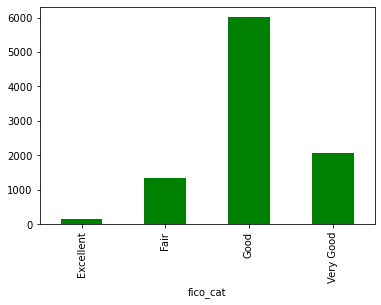

In [13]:
 # get the number of rows in each category, using size aggregate function
catplot = loandata.groupby(['fico_cat']).size()

# plot the above data
catplot.plot.bar(color='green',width=0.5)

<AxesSubplot:xlabel='purpose'>

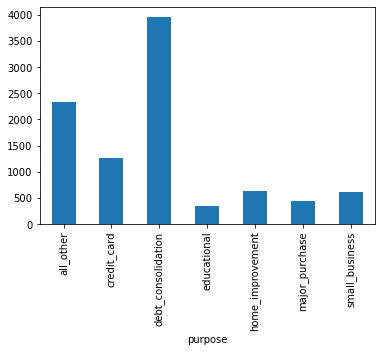

In [14]:
purposecount = loandata.groupby(['purpose']).size() # similar analysis done for purpose category

#plot the above above
purposecount.plot.bar()

Is there any relationship between annual income and debt to income (dti)?

Text(0, 0.5, 'dti')

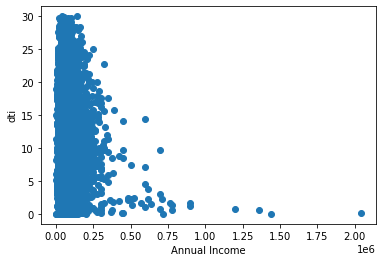

In [15]:
# creating a scatter plot

xpoint = loandata['annual.inc']
ypoint = loandata['dti']
plt.scatter(xpoint, ypoint)
plt.xlabel('Annual Income')
plt.ylabel('dti')

So with the increase in annual income, the dti tends to reduce overall

So finally, the transformed dataset is stored in the form of a csv

In [16]:
loandata.to_csv('loandata_final.csv',index=True)